In [ ]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate


from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 100))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 100))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 100))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 100))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 1005.48it/s]
Reading metadata...: 1013968it [00:14, 68298.99it/s]
Reading metadata...: 7071it [00:00, 38784.19it/s]
Reading metadata...: 540437it [00:09, 58292.37it/s]
Reading metadata...: 105it [00:00, 287.40it/s]
Reading metadata...: 16372it [00:00, 66056.54it/s]
Reading metadata...: 4961it [00:00, 32197.83it/s]
Reading metadata...: 16143it [00:00, 67206.35it/s]
Reading metadata...: 131it [00:00, 1139.02it/s]
Reading metadata...: 16372it [00:00, 67964.42it/s]
Reading metadata...: 4961it [00:00, 32176.91it/s]
Reading metadata...: 16143it [00:00, 61827.16it/s]


In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-medium"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

In [ ]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_medium_lr1",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-9e2ba0ecb4a1>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,8.896200
20,5.438000
30,3.423400
40,2.636400
50,1.760200
60,1.387700
70,1.086900
80,1.257400
90,1.048400
100,0.920400


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=1.0732445879777273, metrics={'train_runtime': 504.8942, 'train_samples_per_second': 2.377, 'train_steps_per_second': 0.594, 'total_flos': 1.224725889024e+18, 'train_loss': 1.0732445879777273, 'epoch': 3.0})

In [ ]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_medium_lr1"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [ ]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")

🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:02<03:19,  2.01s/it]

🔹 Predicted:  그와 동시에 예상적이란 기분엔 구름과 같이 해타지고 안개처럼 쓰러졌다.
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:03<02:31,  1.55s/it]

🔹 Predicted:  하면서도 기차는 동역이가 먹는다는 바람에 숨도 아니시고 쪼그리 탔다.
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:04<02:25,  1.50s/it]

🔹 Predicted:  이사에게 지금의 선고를 받은 줄도 모르는 영신은 주사기 운에 조금 의식을 회복하였다.
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:06<02:17,  1.43s/it]

🔹 Predicted: 모레 경양은 이년으로 삼쩌어나니 보랴갈 듯들고 전쟁할 지니다.
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라


  5%|▌         | 5/100 [00:06<01:50,  1.16s/it]

🔹 Predicted: anjida, bjelko anjida.
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:07<01:33,  1.00it/s]

🔹 Predicted: 고매 난 소리하지 말고 어서 가세
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:08<01:30,  1.03it/s]

🔹 Predicted: 현비는 바다가 지고 한난의 길을 따랐다.
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:09<01:41,  1.10s/it]

🔹 Predicted:  "새벽 배선보다도 로켓 배선보다도 빠른 양자 배송 서비스를 오�elvata 시작합니다."
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:10<01:31,  1.00s/it]

🔹 Predicted: 창아는 이쪽 물을 차오면서 소리를 지른다.
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:11<01:35,  1.06s/it]

🔹 Predicted: 여러 사람의 앞으로 한 걸음 다가서며 그의 건불근 얼굴이 매우 긴장해진다.
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:12<01:24,  1.06it/s]

🔹 Predicted: 여전히 사건 파악을 못하고 있는데도
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:13<01:20,  1.09it/s]

🔹 Predicted:  즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.


 13%|█▎        | 13/100 [00:13<01:11,  1.21it/s]

🔹 Predicted: 이 거리를 들이사 거라요.
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:14<01:13,  1.17it/s]

🔹 Predicted: 간난이는 생곽 웃어 보이며 머리를 흔들었다.
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:15<01:11,  1.19it/s]

🔹 Predicted:  "뭐가 무엇인지 공간할 수 없는 나는 이렇게 물었다."
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:16<01:14,  1.13it/s]

🔹 Predicted: 국무춤니는 국교의 종이를 얻어 대통령이 인양한다.
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 17%|█▋        | 17/100 [00:17<01:16,  1.09it/s]

🔹 Predicted: 부르짖으며 발길로 벽을 걸어 차고 일어났다.
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:18<01:18,  1.04it/s]

🔹 Predicted: 나 오는 젤 모르고 이런 말을 하고도 가슴이 손떡하였다.
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:19<01:14,  1.09it/s]

🔹 Predicted: 저 뒤에 동양상으로 주알룜 사건 결과 나올 겁니다.
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 20%|██        | 20/100 [00:20<01:18,  1.01it/s]

🔹 Predicted: 기으른 자는 말하기를 사자가 밖에 있음직 내가 나가면 거리에서 찍히겠다 하는이라
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라


 21%|██        | 21/100 [00:21<01:08,  1.16it/s]

🔹 Predicted: 그럼 내일 오랍수니까?
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:22<01:11,  1.09it/s]

🔹 Predicted: 그는 다를 미처 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:23<01:14,  1.03it/s]

🔹 Predicted: 그리고 이 집에서 옥자미를 어떻게 지어하는 것을 잠시 간이라도 알 수가 있다.
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:24<01:19,  1.05s/it]

🔹 Predicted: 아까까지 양신은 그 불을 얕은 하늘의 별들이 반짝이는 길로만 알고 있었다.
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:25<01:17,  1.03s/it]

🔹 Predicted:  의심하는 마음과 흠컥원에 일어나는 것은 질투였다.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:27<01:33,  1.26s/it]

🔹 Predicted: 고일김에 그저 이놈의 산인님 하고 대톨에다 뱇곤고 눈이 호양으로 뱇다다다 곽곽 참고 말았다.
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.


 27%|██▋       | 27/100 [00:27<01:15,  1.04s/it]

🔹 Predicted: 여보게 김참지
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:28<01:10,  1.02it/s]

🔹 Predicted: 갑자기 튀어서 나오는 광포, 거기 연한 개미 흥소.
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 29%|██▉       | 29/100 [00:29<01:09,  1.02it/s]

🔹 Predicted: 깨가운 볏이 그의 선신을 확고나게 하였다.
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [00:30<01:15,  1.09s/it]

🔹 Predicted: 어디서 난 다러서 일어끠하며 잠은 자에게 지식과 그지만 날 쳐기 일일고 주니
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 31%|███       | 31/100 [00:32<01:29,  1.30s/it]

🔹 Predicted: 그는 여학생인지 만지가 곰차는 매우 깨까려 빼며 입술을 곽파눌채 김천지를 겉을 떠보지도 않았다.
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 32%|███▏      | 32/100 [00:34<01:36,  1.42s/it]

🔹 Predicted: 곤마길 알경이 이고 도우는 얕을 고툭 치는 소리를 도박도박 내며 올렸다. 고르러 나와버렸다.
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 33%|███▎      | 33/100 [00:35<01:22,  1.24s/it]

🔹 Predicted:  스스로가 헌패가 없다고 생각하지 말라.
🔸 Reference: 스스로가 형편없다고 생각하지 말라.


 34%|███▍      | 34/100 [00:36<01:19,  1.20s/it]

🔹 Predicted: 학은 무엇이라도 할지도 않듯이 가만히 창망에 계속하는 날이 듣고 있다.
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 35%|███▌      | 35/100 [00:37<01:20,  1.23s/it]

🔹 Predicted: 아가의 위덕은은 그 정치인의 모습을 보며 대중의 룰을 생각하여 됐다.
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.


 36%|███▌      | 36/100 [00:38<01:14,  1.17s/it]

🔹 Predicted: こずり実家でお知りであるオスロスランの方にあった
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 37%|███▋      | 37/100 [00:39<01:13,  1.16s/it]

🔹 Predicted: 그 기회로 내주자 하는 사람은 인양하는 막두평과 케이시였었다.
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 38%|███▊      | 38/100 [00:40<01:05,  1.06s/it]

🔹 Predicted: 모델에서는 모두가 흔장하기만 하냐.
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 39%|███▉      | 39/100 [00:41<01:00,  1.01it/s]

🔹 Predicted:  따라서 몰�jap고 싶은 갠가위 버짝 들었다.
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.


 40%|████      | 40/100 [00:42<00:55,  1.08it/s]

🔹 Predicted: 한숨을 낸 여은 세월이 끝났습니다.
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 41%|████      | 41/100 [00:43<00:53,  1.09it/s]

🔹 Predicted: 미리 나 모레 나 파우는 즐거운 노랫다.
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에


 42%|████▏     | 42/100 [00:44<00:52,  1.10it/s]

🔹 Predicted: 장안이 되면 아침이 되는 일이 난데 자가를 닮다.
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 43%|████▎     | 43/100 [00:45<00:52,  1.09it/s]

🔹 Predicted: 밝은 강에 물이 갔음, 일평 간춤이 있음.
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세


 44%|████▍     | 44/100 [00:45<00:43,  1.29it/s]

🔹 Predicted: 니가 놔서
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [00:46<00:52,  1.05it/s]

🔹 Predicted: 반난은은 요금이 들어가던 말까지 하려다가 우름만은 점점 기다렸을려하였다.
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [00:47<00:50,  1.06it/s]

🔹 Predicted: 만일 제 말 그대로 단절의 흰 뿔는 치고 커보길.
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:48<00:53,  1.00s/it]

🔹 Predicted: 검정으로 개와 본을 고르자 되면 그가 20장 빨간 해물게 대는 것이다.
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [00:50<00:56,  1.09s/it]

🔹 Predicted: 지상에다 강하게 늦은 걸 바라는 듯인 비슷한 생각일참을 보기도 또 한 번 삽니다.
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 49%|████▉     | 49/100 [00:51<00:54,  1.08s/it]

🔹 Predicted: 그가 제법 장납다처럼 규족디지로 다짐을 시작한다.
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.


 50%|█████     | 50/100 [00:52<00:59,  1.18s/it]

🔹 Predicted: 무해 자레오신 근처 교훈이 여수에 제삼한 기국에게는 무즈의 목소리가였다.
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:54<01:02,  1.28s/it]

🔹 Predicted: 영신은 가슴 속으로부터 짐이라고 능력참기라고 육자고 육아도 손가락을 띄면다.
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [00:55<01:07,  1.41s/it]

🔹 Predicted: 따라서는 역과에 연주소의 날 본작한 경신을 경하여 달려올 등 선비를 눈앞에 그려 보았다.
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [00:56<01:01,  1.30s/it]

🔹 Predicted: 그저 저러는 것도 각자 건전하지 못해서는 쓰는 것이 아무것도 하신다.
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [00:57<00:56,  1.22s/it]

🔹 Predicted: 그가 그의 담무실 말을 내게 짐으로 내가도 건물이자.
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [00:59<00:55,  1.23s/it]

🔹 Predicted: 니가 니가 내 마음을 두고 일가로 보러 먹지 말라한다 무실가를 먹었는지.
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [01:00<00:52,  1.19s/it]

🔹 Predicted: 병자의 무릠이 서서는 하고 식었으며 얼굴을 파랑히 되었다.
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 57%|█████▋    | 57/100 [01:01<00:50,  1.17s/it]

🔹 Predicted: 그 놈은 수완리게는 운경에서 자극을 하고 여지셔도라.
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.


 58%|█████▊    | 58/100 [01:02<00:42,  1.02s/it]

🔹 Predicted: 춘아의 가을 그는 가는 눈.
🔸 Reference: 지금 바로 입금 가능해?


 59%|█████▉    | 59/100 [01:03<00:40,  1.01it/s]

🔹 Predicted: 일기야여 교화교화사업한저는 끝이 났습니다.
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.


 60%|██████    | 60/100 [01:03<00:38,  1.04it/s]

🔹 Predicted: 그는 얼굴을 닮은 후 다시 종무를 하여 내었다.
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [01:05<00:40,  1.05s/it]

🔹 Predicted: 선비는 간도히 그를 품에 잘 취하고 알바를 가슴이 두고 말었다.
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [01:06<00:41,  1.09s/it]

🔹 Predicted: 옥정이는 어느 때나 신철이를 잊지 못하는 반면이 그만큼 덤이었던 것이다.
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 63%|██████▎   | 63/100 [01:07<00:42,  1.14s/it]

🔹 Predicted: 그대는 굳기 없는 성비를 보며 감동이게서 단단한 남감을 들은 듯하였다.
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.


 64%|██████▍   | 64/100 [01:08<00:36,  1.00s/it]

🔹 Predicted: 지겨운 날엔 고구마일 것이다.
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [01:09<00:35,  1.02s/it]

🔹 Predicted: 먼저 말씀하여 둘과 생 섭석히 생각하시지 말으십시요.
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [01:10<00:33,  1.00it/s]

🔹 Predicted:  보기명으로 투표를 하는데도 대필로 쓴 사람이 많았다.
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 67%|██████▋   | 67/100 [01:11<00:33,  1.02s/it]

🔹 Predicted:  대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.


 68%|██████▊   | 68/100 [01:12<00:31,  1.00it/s]

🔹 Predicted:  배고픈데 지금 저녁식사에 먹으면 번호 이를까?
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [01:13<00:31,  1.03s/it]

🔹 Predicted: 그는 기침을 안 하려고 입을 꼭 담윤 후에 숨으시지 않았다.
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 70%|███████   | 70/100 [01:14<00:34,  1.15s/it]

🔹 Predicted: 동혁은 입술을 꽉 깨물고 원제의 뒤를 따라 묵묵히 눈틀 바틀을 걸었다.
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [01:15<00:29,  1.03s/it]

🔹 Predicted: 대한 사람 대한으로 기지 보정하세.
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [01:17<00:32,  1.16s/it]

🔹 Predicted: 러러해 펄로 오던 동료회의에 회관을 질려고 오늘 저녁에 그의 지경을 당는 것이다.
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 73%|███████▎  | 73/100 [01:18<00:30,  1.11s/it]

🔹 Predicted: 인세계야 정하는 것은 그의 발 앞에 금모를 치는 것이 이라.
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 74%|███████▍  | 74/100 [01:19<00:27,  1.08s/it]

🔹 Predicted: 하단이 밀부터 허리를 거들이며 집 속으로 기아 들어 간다.
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [01:19<00:25,  1.01s/it]

🔹 Predicted:  그와 동시에 기천의 가슴도 쿵 하고 올렸다.
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [01:20<00:24,  1.01s/it]

🔹 Predicted: 춤은은 모레 위에 앉아서 멀리 서울 쪽을 가보고 앉아 있었다.
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 77%|███████▋  | 77/100 [01:22<00:24,  1.05s/it]

🔹 Predicted: 그리고 섬는 컸으며 특시가 서로 견장을 하며 달려고 달려간다.
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.


 78%|███████▊  | 78/100 [01:22<00:22,  1.01s/it]

🔹 Predicted:  kemen kjoha je na tukaj tudi inoj jubta.
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [01:24<00:22,  1.05s/it]

🔹 Predicted: 이서방은 물그러미 이것을 팔아 보며 가슴이 후련해졌다.
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.


 80%|████████  | 80/100 [01:24<00:18,  1.11it/s]

🔹 Predicted: 제가 지금 좀 너무 급해서요.
🔸 Reference: 제가 지금 좀 너무 급해서요.


 81%|████████  | 81/100 [01:25<00:16,  1.13it/s]

🔹 Predicted:  유명한 광양 송아파의 작가 말씀이지요.
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 82%|████████▏ | 82/100 [01:26<00:16,  1.11it/s]

🔹 Predicted: 취약 터져서 경험비 내는 건 못찾는다.
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다


 83%|████████▎ | 83/100 [01:27<00:15,  1.09it/s]

🔹 Predicted: 야호와 하나님이 에그렌동산에서 그 사람을 내어 보며
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [01:28<00:14,  1.07it/s]

🔹 Predicted: 저원대씨와 마동역씨의 음악을 굉장히 편하다고 생각했거든요.
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [01:29<00:16,  1.09s/it]

🔹 Predicted: 그 때 비가 날칫는 듯한 그 점의 조소가 들리는 듯하여 그는 넓히 머리를 시켰다.
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [01:30<00:15,  1.12s/it]

🔹 Predicted: 뭔일인지 선기가 울면 발몽은 건관에 따라 온곤하였던 것이다.
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [01:32<00:15,  1.15s/it]

🔹 Predicted: 여기 그니정은 24시간 내내 열춤해 하라니까 필요한 게 있으면 빼비 사 드세요.
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 88%|████████▊ | 88/100 [01:33<00:13,  1.16s/it]

🔹 Predicted: 하고 창하는 춘우의 얼굴을 한참이냐 물그러미 들여다 보았다.
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.


 89%|████████▉ | 89/100 [01:34<00:11,  1.06s/it]

🔹 Predicted: 여 동생이 정장 어머니를 닮았나 보다.
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [01:35<00:10,  1.08s/it]

🔹 Predicted:  황금장에서는 영상으로 가는 듯한 월급쟁이들이 가득 들이 볼리었다.
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [01:36<00:09,  1.03s/it]

🔹 Predicted: 이가시 이 좋은 새 옷을 준비해 대한 흠소린 사였다.
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [01:37<00:08,  1.02s/it]

🔹 Predicted: 보라 이 사람이 사낙을 하는 일에 우리 중 하나가 책이었음이.
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니


 93%|█████████▎| 93/100 [01:37<00:06,  1.10it/s]

🔹 Predicted: 자, 여기 어떤 상점이 있답시다.
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [01:38<00:05,  1.08it/s]

🔹 Predicted:  그때 그는 경찰서에서 본 것단 생각을 하고 소름이 쭉 기쳤다.
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [01:40<00:04,  1.01it/s]

🔹 Predicted: 일코는 못들은 자고 있다가 사장이 또 우편에서 맡아보고 나였다.
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [01:41<00:04,  1.07s/it]

🔹 Predicted: 자기의 마음을 제어하지 아니하는 자는 성혹이 무너지고 성격이 없는 것 같으니라
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [01:42<00:03,  1.09s/it]

🔹 Predicted: 그의 가슴에는 또다시 그의 실무치가 옥스러 올라온다.
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.


 98%|█████████▊| 98/100 [01:42<00:01,  1.10it/s]

🔹 Predicted: Klajkosta.
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [01:44<00:00,  1.00it/s]

🔹 Predicted: 균안이가 몸을 섞으려고 눈치하는 바람에 선비가 푹 확보어졌다.
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [01:45<00:00,  1.05s/it]

🔹 Predicted: 균부가 섞여 살거니와 모를 그가 들을 채 희인인은 여호와 십리라.
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 0.6093
🌍 Language: en



  1%|          | 1/100 [00:00<01:37,  1.02it/s]

🔹 Predicted: Again, small fast crafts could attack and destroy a major worship.
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:02<01:49,  1.12s/it]

🔹 Predicted: Bolestih kolektivno in selektivno konhenjivno editi bo je Michael Wessonberg.
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:02<01:29,  1.08it/s]

🔹 Predicted: The residents moved to higher ground east of the original site.
🔸 Reference: The residents moved to higher ground east of the original site.


  4%|▍         | 4/100 [00:03<01:15,  1.27it/s]

🔹 Predicted: We need an end of all such matter.
🔸 Reference: We need an end of all such matter.


  5%|▌         | 5/100 [00:04<01:18,  1.21it/s]

🔹 Predicted: Bridgeck bo spolaj in razljubil v Kareli.
🔸 Reference: Bridget was born and raised in Ghana.


  6%|▌         | 6/100 [00:05<01:18,  1.20it/s]

🔹 Predicted: The crash is the deadliest aviation disaster in both both country and appear in history.
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:05<01:11,  1.31it/s]

🔹 Predicted: The bitch's roof is quiet in the vehicles.
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:07<01:32,  1.00s/it]

🔹 Predicted: Skiingatno je odvrstno s svojim veste v oblade s svojim popolem in dvizem.
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


  9%|▉         | 9/100 [00:08<01:37,  1.07s/it]

🔹 Predicted: Egyptijska arkeoloji je ena z obrečeških izemljivljenih.
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.


 10%|█         | 10/100 [00:09<01:33,  1.03s/it]

🔹 Predicted: Itsa je zelo znana za "Bale-Oakem in Rope".
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:10<01:42,  1.15s/it]

🔹 Predicted: Odne semoljare explainacije vzimajo Šavarovine vrstve in vrstu vladeh.
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 12%|█▏        | 12/100 [00:12<01:57,  1.34s/it]

🔹 Predicted: Bolhov on sami izvrša vseh vrhajljivih vrstov, pa je v respektivnih servicih targansih.
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 13%|█▎        | 13/100 [00:13<01:47,  1.24s/it]

🔹 Predicted: Odrej se občasljajo v čestu in v geometriji.
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 14%|█▍        | 14/100 [00:14<01:32,  1.07s/it]

🔹 Predicted: I will continue to sleep another one more than you thought.
🔸 Reference: I wanted to sleep a little longer, he thought.


 15%|█▌        | 15/100 [00:15<01:22,  1.02it/s]

🔹 Predicted: Otten with the programs are selected in are in large element.
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:15<01:12,  1.16it/s]

🔹 Predicted: A man is drilling out in is back out.
🔸 Reference: A man is grilling out in his backyard.


 17%|█▋        | 17/100 [00:16<01:13,  1.13it/s]

🔹 Predicted: A large black dog is getting a frisky while the large brown dog follows shortly after.
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.


 18%|█▊        | 18/100 [00:17<01:11,  1.14it/s]

🔹 Predicted: Aar bit das Klinische Sfeer geobt als necessar.
🔸 Reference: Arctic rescue missions were mounted as necessary.


 19%|█▉        | 19/100 [00:18<01:09,  1.16it/s]

🔹 Predicted: Cortex erregies simply die "Bardendent" decision.
🔸 Reference: Carter said racism played a part in the decision.


 20%|██        | 20/100 [00:19<01:04,  1.23it/s]

🔹 Predicted: Its more order is the typical subject-object order.
🔸 Reference: Its word order is the typical subject-object-verb.


 21%|██        | 21/100 [00:19<01:04,  1.23it/s]

🔹 Predicted: The one comment also to restore a variety of services to the profisal.
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.


 22%|██▏       | 22/100 [00:20<01:08,  1.14it/s]

🔹 Predicted: Dobre, še te vlade, na posljivanje je malo.
🔸 Reference: To which he replies: I thought she was your mother!


 23%|██▎       | 23/100 [00:21<01:04,  1.19it/s]

🔹 Predicted: Later that night, David did not want to be in land.
🔸 Reference: Later that night Jill is kidnapped by gill men.


 24%|██▍       | 24/100 [00:22<00:58,  1.30it/s]

🔹 Predicted: Empty Bars make the most noise.
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:23<01:05,  1.14it/s]

🔹 Predicted: Kanj je korpoz in korpoz je vrstil, je bilo vrstil.
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:24<01:20,  1.09s/it]

🔹 Predicted: Nampol. Gdje je naša vrstna Vrnpoljstva vsega vrstna, je naša vrstna.
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:26<01:18,  1.07s/it]

🔹 Predicted: The term "odam" looked in to police still referred to gaining variety of "bomber style".
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 28%|██▊       | 28/100 [00:26<01:08,  1.04it/s]

🔹 Predicted: The American Theatre Hall of Fame is located in the lobby.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.


 29%|██▉       | 29/100 [00:27<00:59,  1.20it/s]

🔹 Predicted: Had always wanted to do this.
🔸 Reference: I've always wanted to do this!


 30%|███       | 30/100 [00:28<00:58,  1.20it/s]

🔹 Predicted: Holgo obanem je Kansler in Wigdol.
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 31%|███       | 31/100 [00:29<01:04,  1.08it/s]

🔹 Predicted: A work as it is, show even Michael Yoak, Clasen and Estonia. Michael Loak and Loak.
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 32%|███▏      | 32/100 [00:30<01:05,  1.03it/s]

🔹 Predicted: I je sveti prezes šipa, kaj spomeni imen.Omaran.
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 33%|███▎      | 33/100 [00:30<00:58,  1.15it/s]

🔹 Predicted: Larish dismissed these claims as being false.
🔸 Reference: English dismissed these claims as being false.


 34%|███▍      | 34/100 [00:32<01:06,  1.01s/it]

🔹 Predicted: Akoj se nezvesljak nevigel, vitri je member of the Maritim-Bolivice.
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 35%|███▌      | 35/100 [00:33<01:15,  1.15s/it]

🔹 Predicted: Odeglečitvo se kajno zidlo by delajit, le do lečnej karni bilo vdježil.
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.


 36%|███▌      | 36/100 [00:34<01:04,  1.00s/it]

🔹 Predicted: A word is the kind that parts to a cast.
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [00:35<00:56,  1.12it/s]

🔹 Predicted: シアースン・ジャイキュード
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [00:50<05:22,  5.20s/it]

🔹 Predicted: Oreterarive občasih so zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelo zelozelozelozelozelozelozelozelozelozelozelozelozelozelozel

 39%|███▉      | 39/100 [00:50<03:54,  3.85s/it]

🔹 Predicted: I would not recommend publishing the article without the data set.
🔸 Reference: I would not recommend publishing the article without the dataset.


 40%|████      | 40/100 [00:51<02:50,  2.85s/it]

🔹 Predicted: What's the horny hell?
🔸 Reference: What's the idea here?


 41%|████      | 41/100 [00:51<02:06,  2.14s/it]

🔹 Predicted: You get plenty of money.
🔸 Reference: You got plenty of money?


 42%|████▏     | 42/100 [00:52<01:35,  1.65s/it]

🔹 Predicted: There is no fighting against fate.
🔸 Reference: There is no fighting against fate


 43%|████▎     | 43/100 [00:53<01:14,  1.31s/it]

🔹 Predicted: Nothing is the matter with me.
🔸 Reference: Nothing's the matter with me.


 44%|████▍     | 44/100 [00:54<01:15,  1.36s/it]

🔹 Predicted: Nagar zvosim banor za izavrljivljiv šestoljiv spolno situaciju dvam.
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 45%|████▌     | 45/100 [00:55<01:01,  1.11s/it]

🔹 Predicted: I want as human as us humans.
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [01:10<04:47,  5.32s/it]

🔹 Predicted: Vrkaj se lahko potreba način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začetka način začin začetka način začetka način začetka način začin začetka način začin zač
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 47%|████▋     | 47/100 [01:11<03:40,  4.15s/it]

🔹 Predicted: Dessidini je spasovil in donoblil svoje diozise na angolskih kultivih in monastih.
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [01:12<02:44,  3.16s/it]

🔹 Predicted: Gudar dan, Daljab glimste havo miskali.
🔸 Reference: To that end, Talia claims to have miscarried.


 49%|████▉     | 49/100 [01:13<02:08,  2.52s/it]

🔹 Predicted: In musicias, the condition is called Musicias Vocalistonia, or simply Musicias Histonia.
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [01:14<01:37,  1.94s/it]

🔹 Predicted: He said that everything has its own destiny.
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [01:15<01:30,  1.85s/it]

🔹 Predicted: Kanje je se obziral sestor in sestor, se je odlično obziral in obziral na elementarnih vodih.
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [01:17<01:22,  1.72s/it]

🔹 Predicted: Ih je to rentom tisko obdirjeno v sem čas sedemtja se osavljavljavis.
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [01:18<01:09,  1.48s/it]

🔹 Predicted: Casere soil hides evok for various similar forms, such as pisteris walls.
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 54%|█████▍    | 54/100 [01:19<01:04,  1.39s/it]

🔹 Predicted: Havrej, sečino reakce mislijo, da se za naše semplice začel.
🔸 Reference: However, certain reactants do not follow this simple pattern.


 55%|█████▌    | 55/100 [01:19<00:50,  1.13s/it]

🔹 Predicted: The tournament features four 18 regions.
🔸 Reference: The tournament features four eight-team regions.


 56%|█████▌    | 56/100 [01:20<00:50,  1.15s/it]

🔹 Predicted: Sholter Campbell sečešil s jim na Bratiskej, Barenske in Atport.
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.


 57%|█████▋    | 57/100 [01:21<00:45,  1.06s/it]

🔹 Predicted: The story focuses on the history of the villainous wizard, Martin Dordak.
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 58%|█████▊    | 58/100 [01:23<00:47,  1.12s/it]

🔹 Predicted: Ozgimost je vodil vse o vrljivljeni presv in te nesnice.
🔸 Reference: Mosby mostly wrote for United Press International.


 59%|█████▉    | 59/100 [01:23<00:38,  1.08it/s]

🔹 Predicted: The facilities are very big.
🔸 Reference: The facilities are very basic.


 60%|██████    | 60/100 [01:24<00:38,  1.04it/s]

🔹 Predicted: Defelirar are molecular distinctions.Elektifelirar shall both be produced.
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 61%|██████    | 61/100 [01:25<00:35,  1.09it/s]

🔹 Predicted: I didn't always begin to customize much, mostly because of my limited journal.
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [01:26<00:33,  1.14it/s]

🔹 Predicted: Hardcast Cinema hosted selected films during the annual International Istanbul Film Festival.
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [01:26<00:31,  1.19it/s]

🔹 Predicted: The book covers several issues in the political and historical scenarios of Nepal.
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 64%|██████▍   | 64/100 [01:27<00:28,  1.26it/s]

🔹 Predicted: Aging and memory are key preoccupations of this novel.
🔸 Reference: Ageing and memory are key preoccupations of this novel.


 65%|██████▌   | 65/100 [01:28<00:26,  1.34it/s]

🔹 Predicted: The movie was almost ready to cry with disappointment.
🔸 Reference: Dorothy was almost ready to cry with disappointment.


 66%|██████▌   | 66/100 [01:29<00:25,  1.31it/s]

🔹 Predicted: What guides it names would help in viewing to go for people's health.
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 67%|██████▋   | 67/100 [01:30<00:28,  1.15it/s]

🔹 Predicted: Niall v ljudi del, dekolj vrljitljitljit.
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 68%|██████▊   | 68/100 [01:30<00:24,  1.30it/s]

🔹 Predicted: A couple knew that some bad word.
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [01:32<00:30,  1.01it/s]

🔹 Predicted: Felip je stari na levi, vidjel vse vrsti, vrsti zelo zelo in vrsti zelo.
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [01:32<00:27,  1.08it/s]

🔹 Predicted: I show must learn wearing bracelets and a garland carrying a pole.
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 71%|███████   | 71/100 [01:33<00:24,  1.19it/s]

🔹 Predicted: The spot on the water was made by green ink.
🔸 Reference: The spot on the blotter was made by green ink.


 72%|███████▏  | 72/100 [01:34<00:22,  1.22it/s]

🔹 Predicted: A use of research and lab examples explained those and the laboratory equipment.
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...


 73%|███████▎  | 73/100 [01:35<00:23,  1.14it/s]

🔹 Predicted: Meni čiljkev mora obdobjati v obdobjavih.
🔸 Reference: Many children walk together on a dirt path.


 74%|███████▍  | 74/100 [01:36<00:24,  1.05it/s]

🔹 Predicted: The ladies play the violin and the guitar on the street when the tender poser bars.
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 75%|███████▌  | 75/100 [01:37<00:23,  1.04it/s]

🔹 Predicted: A young dustin' boy in a large herd sit on next to the large pile of sandals.
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.


 76%|███████▌  | 76/100 [01:38<00:20,  1.17it/s]

🔹 Predicted: A student may work independently or collaborate with others.
🔸 Reference: The student may work independently or collaborate with others.


 77%|███████▋  | 77/100 [01:40<00:26,  1.16s/it]

🔹 Predicted: Zemeljno je načel skupiti svoje gradirateljstvo, sez se vrstno vrstno vrstno vrstno vrstno.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.


 78%|███████▊  | 78/100 [01:40<00:21,  1.00it/s]

🔹 Predicted: The group was under the leadership of Michael Collins.
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [01:41<00:19,  1.08it/s]

🔹 Predicted: The green lock in the others powerful browser does not really interest us.
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [01:41<00:16,  1.23it/s]

🔹 Predicted: Wall-Easton champion.
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [01:42<00:15,  1.22it/s]

🔹 Predicted: If you just write the code during this order, only I make certain decisions.
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [01:44<00:17,  1.05it/s]

🔹 Predicted: Firefox je začel boste najizniječi začetek, ali mi je prezidenten Chrome.
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 83%|████████▎ | 83/100 [01:45<00:17,  1.01s/it]

🔹 Predicted: Politi vse je sot dema i kjivan ležtolga v vrstu.
🔸 Reference: Thought there might be one left over.


 84%|████████▍ | 84/100 [01:46<00:15,  1.00it/s]

🔹 Predicted: Miljard posta je zelo nekaj, ki greo vsega.
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.


 85%|████████▌ | 85/100 [01:47<00:15,  1.06s/it]

🔹 Predicted: Ekran beklostiraj, stradis daj apelantikovol in daj ali modern video.
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [01:48<00:13,  1.02it/s]

🔹 Predicted: In times it is also used within the labor act of the partition order.
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.


 87%|████████▋ | 87/100 [01:48<00:11,  1.16it/s]

🔹 Predicted: She was buried at the University of Frankfurt.
🔸 Reference: She was buried at the in Frankfurt.


 88%|████████▊ | 88/100 [01:49<00:10,  1.18it/s]

🔹 Predicted: She became the Minister for Youth and Sports in the Wazarei Cabinet.
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.


 89%|████████▉ | 89/100 [01:50<00:10,  1.08it/s]

🔹 Predicted: Takšno je 7 ali 8 stany in 2 stanynoti začelati vsega.
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.


 90%|█████████ | 90/100 [01:51<00:08,  1.17it/s]

🔹 Predicted: I could die happily, and that made me so good.
🔸 Reference: I could die happily, and that made me feel good.


 91%|█████████ | 91/100 [01:52<00:07,  1.22it/s]

🔹 Predicted: A lady with glasses holds a baby who is looking up at her.
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 92%|█████████▏| 92/100 [01:53<00:07,  1.11it/s]

🔹 Predicted: Opasen je dat gluč, ki je odlopi doga do srpega.
🔸 Reference: A person in dark clothes is walking down to the subway.


 93%|█████████▎| 93/100 [01:54<00:06,  1.10it/s]

🔹 Predicted: As long as you're in the white cat, you just want to be in the bush.
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [01:54<00:05,  1.10it/s]

🔹 Predicted: Split na vatnu je kret, šar, blol.
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [01:55<00:04,  1.15it/s]

🔹 Predicted: Alvinum understones in Bain-Bain also reason.
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 96%|█████████▌| 96/100 [01:57<00:03,  1.00it/s]

🔹 Predicted: Arenojo, je varendi a verjavati vlajit in indivizijal.The Boarder,
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.


 97%|█████████▋| 97/100 [01:57<00:02,  1.08it/s]

🔹 Predicted: Baihut im veseljši veselj.
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [01:58<00:01,  1.13it/s]

🔹 Predicted: The awkwardness set out in Selle could understand what was going on.
🔸 Reference: The opera had surtitles, so we could understand what was going on


 99%|█████████▉| 99/100 [01:59<00:00,  1.26it/s]

🔹 Predicted: We grow stronger when we feel to help.
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [01:59<00:00,  1.20s/it]

🔹 Predicted: More recently, professional thinkers are responsible for operation prior to paper.
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.
✅ EN WER: 0.9600
🌍 Language: ja



  1%|          | 1/100 [00:00<01:38,  1.00it/s]

🔹 Predicted: 風に吹かれるように離れていった
🔸 Reference: 風に吹かれるように離れていった


  2%|▏         | 2/100 [00:01<01:20,  1.22it/s]

🔹 Predicted: どんどんそうらしい、そうだ、ずっと
🔸 Reference: どうもそうらしい、そうだ、きっと


  3%|▎         | 3/100 [00:02<01:29,  1.09it/s]

🔹 Predicted: 公園の団地と一緒だった、なにも見つからなかった
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:03<01:24,  1.13it/s]

🔹 Predicted: ノリボンではテールズ川の近くに住む。
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:04<01:43,  1.08s/it]

🔹 Predicted: 頭の中でアニメの映像が長いて、他のことについてなにも考えることができない状態。
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態


  6%|▌         | 6/100 [00:05<01:31,  1.03it/s]

🔹 Predicted: フェルディもそうなようやく取れます
🔸 Reference: 冬でもそうめんをよく食べます


  7%|▋         | 7/100 [00:06<01:18,  1.18it/s]

🔹 Predicted: Miljiken kuanas.
🔸 Reference: 三重県桑名市


  8%|▊         | 8/100 [00:07<01:18,  1.18it/s]

🔹 Predicted: チントレの成果が出る前に腰を痛むた
🔸 Reference: 筋トレの成果がでる前に腰を痛めた


  9%|▉         | 9/100 [00:07<01:06,  1.36it/s]

🔹 Predicted: 京都市南区
🔸 Reference: 京都市南区


 10%|█         | 10/100 [00:08<01:08,  1.31it/s]

🔹 Predicted: Lundtnationen sein geit das Land begin mit der Stadt.
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:09<01:08,  1.30it/s]

🔹 Predicted: ハチヤキタマゴは簡単にできる。
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:10<01:18,  1.13it/s]

🔹 Predicted: 乌って来てる経無しの足だった遠距離派で覚えてしまった
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:11<01:28,  1.02s/it]

🔹 Predicted: ヘッティス社成社と同年は共に心の出たことで、社会主義もなってきた。
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:12<01:29,  1.04s/it]

🔹 Predicted: チコの中に一生を手掛され、無略の見込みください。
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:15<02:12,  1.56s/it]

🔹 Predicted: カラータの名の中で、立派な用の名として、無償的で取り組まないとして、現地で使用したり、歴史的で使用している社会は、社会の生物の社会での運用社会であったとして、
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。


 16%|█▌        | 16/100 [00:16<01:55,  1.37s/it]

🔹 Predicted: 社고で出向しちゃうが、地点で汽車で乱る
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:17<01:46,  1.28s/it]

🔹 Predicted: カイコプタキョウキョルコーティンは作り解決します。
🔸 Reference: 外国だと驚くほど安く買えたりします


 18%|█▊        | 18/100 [00:18<01:38,  1.20s/it]

🔹 Predicted: スケジャットの映像に、リュムエクシリとあったか
🔸 Reference: 好きだった映画がリメイクされた


 19%|█▉        | 19/100 [00:19<01:31,  1.13s/it]

🔹 Predicted: 公園の家で一設は残ると比べて変わっていた
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた


 20%|██        | 20/100 [00:20<01:21,  1.02s/it]

🔹 Predicted: キムは一体交付場で所属となった
🔸 Reference: 自分は、いったい幸福なのでしょうか


 21%|██        | 21/100 [00:21<01:25,  1.08s/it]

🔹 Predicted: Sestavno je vse kot vratit, tečit in tečit, kumalino kutno.
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [00:22<01:17,  1.01it/s]

🔹 Predicted: 彼は実家の墓に埋蔵された
🔸 Reference: 彼は、実家のお墓に埋葬された。


 23%|██▎       | 23/100 [00:23<01:22,  1.07s/it]

🔹 Predicted: 木箔の向こうの大きな写真が、僕が知らない君に向けてメインする。
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。


 24%|██▍       | 24/100 [00:24<01:15,  1.01it/s]

🔹 Predicted: 料理酒を入れるとコクが出て美味しくなる。
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 25%|██▌       | 25/100 [00:25<01:07,  1.11it/s]

🔹 Predicted: 過去に捉えられていると動けない
🔸 Reference: 過去にとらわれてると動けない


 26%|██▌       | 26/100 [00:26<01:06,  1.11it/s]

🔹 Predicted: 利用者の意見を参考にするという経験者
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 27%|██▋       | 27/100 [00:27<01:09,  1.05it/s]

🔹 Predicted: リニュアルオープンというか、ほとんど変わっていなかった。
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった


 28%|██▊       | 28/100 [00:27<01:03,  1.14it/s]

🔹 Predicted: Gojak ni tohoto vrešilis.
🔸 Reference: お役に立ててうれしいです


 29%|██▉       | 29/100 [00:28<00:57,  1.23it/s]

🔹 Predicted: 岡山県伊沙区市
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [00:29<00:59,  1.19it/s]

🔹 Predicted: 見てないけど、感動はありがとのせいでで安くてた
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 31%|███       | 31/100 [00:30<01:04,  1.07it/s]

🔹 Predicted: 技術は生産的である、世界を革新し、また豊富にする。
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:31<01:04,  1.06it/s]

🔹 Predicted: 静防用具が一体だけど、話している本にもわかってない。
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [00:32<01:14,  1.11s/it]

🔹 Predicted: 手入れたものを、それ自身が自己の人格として自己のうちから自己を越え行くことでなければならない。
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。


 34%|███▍      | 34/100 [00:33<01:01,  1.06it/s]

🔹 Predicted: 내가 살고 있으며,
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:34<00:59,  1.10it/s]

🔹 Predicted: いずれ僕もあと30年もしたら言うことだけで。
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:35<01:01,  1.04it/s]

🔹 Predicted: 僕も君の背中に向けて、ジャードと言い返して手を張った。
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [00:36<01:00,  1.03it/s]

🔹 Predicted: 注文は随分多いでしょうが、どうか一々こらえて下さい。
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 38%|███▊      | 38/100 [00:37<01:09,  1.12s/it]

🔹 Predicted: 掘り出した砂を砂場の真ん中に集めて固めて山にして、また山に砂を掛ける。
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける


 39%|███▉      | 39/100 [00:38<01:06,  1.09s/it]

🔹 Predicted: Rikra ningen datte, so oizima demo sacaer kotemo aremoj.
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:40<01:08,  1.14s/it]

🔹 Predicted: Sobo debo okrelo asemno, ana vhori, jama v cikri, mata ana vhori.
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 41%|████      | 41/100 [00:41<01:06,  1.12s/it]

🔹 Predicted: それこそ先段に一番の金合いどれも言うべき一一一発の
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、


 42%|████▏     | 42/100 [00:42<01:03,  1.10s/it]

🔹 Predicted: "Minja koko ne ojte kudasai" to kaite ali mosto.
🔸 Reference: みんなここに置いてくださいと書いてありました


 43%|████▎     | 43/100 [00:42<00:52,  1.09it/s]

🔹 Predicted: Doda je toliko?
🔸 Reference: どうだ、とるか


 44%|████▍     | 44/100 [00:43<00:44,  1.25it/s]

🔹 Predicted: 脇中を見ていった
🔸 Reference: 空き地を埋めていった


 45%|████▌     | 45/100 [00:44<00:52,  1.05it/s]

🔹 Predicted: しかも後で聞くと、それは所生という人間中で一番動脈の主族であったそうだ。
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ


 46%|████▌     | 46/100 [00:45<00:44,  1.20it/s]

🔹 Predicted: ほしいキャラが出ない
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [00:46<00:45,  1.16it/s]

🔹 Predicted: 大量の睡眠薬を飲んだ猫のようにじっとする
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 48%|████▊     | 48/100 [01:01<04:30,  5.19s/it]

🔹 Predicted: Okaj na kanalu je vse kot vse zelo podobno, kakšenje in vse zelo zelo zelo zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zelo vse zel

 49%|████▉     | 49/100 [01:01<03:13,  3.80s/it]

🔹 Predicted: Sherkej koliž.
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [01:02<02:25,  2.91s/it]

🔹 Predicted: Wilneke nun die Geruchohle doch schnüscht.
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [01:03<01:55,  2.36s/it]

🔹 Predicted: 記事的に使えたものを忘れて、形と形のペリネとと。
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 52%|█████▏    | 52/100 [01:05<01:36,  2.00s/it]

🔹 Predicted: 加藤匡県県大河県河川県町会市の中です
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 53%|█████▎    | 53/100 [01:05<01:13,  1.57s/it]

🔹 Predicted: 京都府県河境
🔸 Reference: 京都府精華町


 54%|█████▍    | 54/100 [01:06<01:02,  1.35s/it]

🔹 Predicted: Δοίτε, οριαματινή χώρας.
🔸 Reference: 岡山県井原市


 55%|█████▌    | 55/100 [01:07<00:54,  1.21s/it]

🔹 Predicted: Kifke hot-pone lečit, očimo što.
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [01:08<00:48,  1.11s/it]

🔹 Predicted: Riesus hat hier uring des Okneizköchens nach getan.
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 57%|█████▋    | 57/100 [01:09<00:47,  1.11s/it]

🔹 Predicted: あの国际観覧がどこにもしてに即席主義に取れてあった
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 58%|█████▊    | 58/100 [01:10<00:41,  1.01it/s]

🔹 Predicted: Ey klobem ist auch dabei getötet.
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [01:10<00:39,  1.03it/s]

🔹 Predicted: 一周は放つ煙が隙間からはいり込んでくる
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [01:12<00:49,  1.24s/it]

🔹 Predicted: 形成するとは物を作ることである。物を作るとは物に形丸を丸えることと、その形を変えて新しい形の物にすることである。
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 61%|██████    | 61/100 [01:13<00:44,  1.13s/it]

🔹 Predicted: それが我々の性格と個々性とかいうものである。
🔸 Reference: それが我々の性格とか個性とかいうものである。


 62%|██████▏   | 62/100 [01:14<00:36,  1.05it/s]

🔹 Predicted: 東京都国家本治市
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [01:14<00:31,  1.19it/s]

🔹 Predicted: 買う人がいるから作られる
🔸 Reference: 買う人がいるから作られる


 64%|██████▍   | 64/100 [01:15<00:29,  1.23it/s]

🔹 Predicted: Jel bi danes što je ammanjerov?
🔸 Reference: ヨルダンの首都はアンマンである


 65%|██████▌   | 65/100 [01:16<00:28,  1.25it/s]

🔹 Predicted: Denikariridem ko je vstanudil?
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [01:17<00:32,  1.03it/s]

🔹 Predicted: お見り手が無小さい記事でも、それは心臓のそばにあって無知的な記事でもあった。
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった


 67%|██████▋   | 67/100 [01:18<00:26,  1.23it/s]

🔹 Predicted: やっぱり常大
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [01:18<00:26,  1.23it/s]

🔹 Predicted: 不適されてないやりになるのを押さえる
🔸 Reference: ふてくされて投げやりになるのをおさえる


 69%|██████▉   | 69/100 [01:20<00:28,  1.08it/s]

🔹 Predicted: スモルのラッテリーの列車が速くて、開会を検討している。
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 70%|███████   | 70/100 [01:22<00:37,  1.26s/it]

🔹 Predicted: Watashi no rizik te現象が考えると共に、私の理識として実にあるというのは、水城県議院においての無言的自己同一でなければならない。
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。


 71%|███████   | 71/100 [01:22<00:31,  1.09s/it]

🔹 Predicted: 日本を落としようにする必要がある
🔸 Reference: リモート仕様にする必要がある


 72%|███████▏  | 72/100 [01:23<00:26,  1.05it/s]

🔹 Predicted: スコリを消して時間を節約する
🔸 Reference: 作り置きして時間を節約する


 73%|███████▎  | 73/100 [01:24<00:23,  1.13it/s]

🔹 Predicted: ネギするが立ち町大事と
🔸 Reference: デビューするやたちまち大ヒット


 74%|███████▍  | 74/100 [01:26<00:35,  1.36s/it]

🔹 Predicted: Rovkaj tegnega všečtejtiki zvukovitovstvoj točitev, varevare je srednje kapaljivih, vrstovih in vrstovih zvukovitovstvoj.
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [01:27<00:30,  1.24s/it]

🔹 Predicted: そうして、経営協和を渡るなきゃいけない
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [01:28<00:28,  1.17s/it]

🔹 Predicted: 凄い安い距離が出て来ないけど近くにあると出すから
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 77%|███████▋  | 77/100 [01:29<00:27,  1.19s/it]

🔹 Predicted: 作られたものから作るものへという、作られたものは史から作られたものでありながら、
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、


 78%|███████▊  | 78/100 [01:30<00:22,  1.04s/it]

🔹 Predicted: 上手いけど手が一人取りだる
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [01:31<00:20,  1.01it/s]

🔹 Predicted: "Ihna no akshipa no sekimu janai yo".
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [01:32<00:20,  1.01s/it]

🔹 Predicted: 相互に期限、切れた、用具と同じに生き出して食べる。
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [01:33<00:18,  1.05it/s]

🔹 Predicted: 그 약이,我々가 간소에 사용을 할 것이다.
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [01:34<00:15,  1.14it/s]

🔹 Predicted: みんなが言うことをそれほど安くもない
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [01:35<00:15,  1.07it/s]

🔹 Predicted: warewareno hoxin tukin jikoniz manu monode nakele bapta.
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 84%|████████▍ | 84/100 [01:36<00:17,  1.12s/it]

🔹 Predicted: 신상은 원인은 받지 마카라와 무진する므로라 깻잇분する두와 이외에 나게 하며
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 85%|████████▌ | 85/100 [01:37<00:15,  1.03s/it]

🔹 Predicted: ココはそうでないもちで、念が増えてきた
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [01:38<00:12,  1.14it/s]

🔹 Predicted: 名古屋市水北
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [01:38<00:10,  1.25it/s]

🔹 Predicted: 岡山県赤岩市
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [01:39<00:08,  1.40it/s]

🔹 Predicted: 新潟市秋箱
🔸 Reference: 新潟市秋葉区


 89%|████████▉ | 89/100 [01:40<00:09,  1.22it/s]

🔹 Predicted: 「ああいう風化のことが今でも行われているのかどうかも知らず、
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、


 90%|█████████ | 90/100 [01:41<00:08,  1.15it/s]

🔹 Predicted: "なんでもいいから、笑わせておればいいのだ。
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 91%|█████████ | 91/100 [01:43<00:10,  1.20s/it]

🔹 Predicted: Tada, kareno teno hrana ni noseralite, ssutno moče agaralita toki, nanakar fojahovašta kanji ga ato pačali.
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである


 92%|█████████▏| 92/100 [01:43<00:08,  1.07s/it]

🔹 Predicted: 爆発の感覚者の軸に入れました
🔸 Reference: 幕末の漢学者の塾に入れました


 93%|█████████▎| 93/100 [01:44<00:06,  1.11it/s]

🔹 Predicted: 山口県山口市
🔸 Reference: 山口県山口市


 94%|█████████▍| 94/100 [01:45<00:05,  1.14it/s]

🔹 Predicted: 君は都所会に行こうと思うと声を上げた
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [01:46<00:04,  1.16it/s]

🔹 Predicted: Slišali se na tudi, da se je zapomal.
🔸 Reference: 知り合ったときのことは忘れた


 96%|█████████▌| 96/100 [01:46<00:03,  1.32it/s]

🔹 Predicted:  どうも変な家だ
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [01:47<00:02,  1.08it/s]

🔹 Predicted: 로보가 가잇 난 짐이다 김이 아래 이 무너가 간절하게 그릇몹이 아래
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [01:49<00:01,  1.02it/s]

🔹 Predicted: 不意に人間の恐ろしい正体を左によって暴殺する様子を見て、
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [01:49<00:00,  1.03it/s]

🔹 Predicted: 人間のつましさに安全とし、悲しい思いをしました。
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [01:51<00:00,  1.11s/it]

🔹 Predicted: 派手な、なんでも様子がおかしいともそろそろ排出してみると非常に痛い。
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 4.7100
🌍 Language: de



  1%|          | 1/100 [00:00<01:21,  1.21it/s]

🔹 Predicted: Kanntest du das Gelicht schon?
🔸 Reference: Kanntest du das Gedicht schon?


  2%|▏         | 2/100 [00:01<01:20,  1.22it/s]

🔹 Predicted: Hallo! Möste in si auch zur Sprechstunde?
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?


  3%|▎         | 3/100 [00:02<01:19,  1.22it/s]

🔹 Predicted: Gut seit dann kamen mir noch ein letztes Assim Ärmel.
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  4%|▍         | 4/100 [00:03<01:40,  1.05s/it]

🔹 Predicted: Wen zu einem Passagierflugzeug der Funk Kontakt abbricht, staubte na routine-mésik zwei Abwaltjäger.
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.


  5%|▌         | 5/100 [00:04<01:41,  1.07s/it]

🔹 Predicted: Sie vodilte jaz krupe in jim zingen untašteljt.
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.


  6%|▌         | 6/100 [00:05<01:38,  1.05s/it]

🔹 Predicted: Unter anderen Habselikalikaten ist dort ein Schwein, auf dem Fluss zu erkennen.
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:07<01:38,  1.05s/it]

🔹 Predicted: Ankrenzen je gewesen, reszter Ostrak vodil obavljutit.
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:08<01:35,  1.04s/it]

🔹 Predicted: Dadarče je lahko vse urebovati za vsega zelo.
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


  9%|▉         | 9/100 [00:09<01:36,  1.06s/it]

🔹 Predicted: Ev verdijen se sežel, da se je danak zelo bolj vzdušal.
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:10<01:32,  1.03s/it]

🔹 Predicted: In der mexikalischen Volksmedizin findet sich Tradition der arztikischen Medizin.
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:11<01:40,  1.13s/it]

🔹 Predicted: Dabrš tis je auf eine Gruppe, der impe regio do ungevöhniji als eine Applönt.
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 12%|█▏        | 12/100 [00:12<01:27,  1.01it/s]

🔹 Predicted: Queen Anne des Suzuki in der Halles verbirgt.
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:12<01:19,  1.10it/s]

🔹 Predicted: Zwei weitere Kinder waren bereits vor Heilberg verstorben.
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:14<01:29,  1.04s/it]

🔹 Predicted: Die Einkünfte aus dem Siegel werden im möglich, in es vorabem, als Feier schroft charakteristisch zu werden.
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.


 15%|█▌        | 15/100 [00:15<01:23,  1.02it/s]

🔹 Predicted: Es tut mir lejt, aber ich habe frisch geschlafen.
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 16%|█▌        | 16/100 [00:16<01:24,  1.01s/it]

🔹 Predicted: Nestisem malem vrede ich nicht bei Grunewalke Schemmelschaum.
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 17%|█▋        | 17/100 [00:17<01:21,  1.02it/s]

🔹 Predicted: Ich lese vor, du möest im hinterherundi beklagen, okay?
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:18<01:21,  1.00it/s]

🔹 Predicted: Narom prestigem mene in frage se jenem nasi šležt.
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [00:19<01:20,  1.01it/s]

🔹 Predicted: Heidelaulik nordvesti je svoj metropods Lüneburger Heide.
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [00:20<01:22,  1.03s/it]

🔹 Predicted: Mit diesem Verein konnte er bereits im juhem jahe na erste nationale Apogefejn.
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 21%|██        | 21/100 [00:21<01:17,  1.02it/s]

🔹 Predicted: Sie je odzval tistolikaj in kresilj.
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [00:22<01:18,  1.01s/it]

🔹 Predicted: Zalrejše technische Offenungen ammoliklishten najo vormen.
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.


 23%|██▎       | 23/100 [00:23<01:17,  1.01s/it]

🔹 Predicted: Dod lagat je nekaj municij in način na druge materiale.
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 24%|██▍       | 24/100 [00:23<01:10,  1.07it/s]

🔹 Predicted: Der europäische Zweig wird von Wien ausgestalt.
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.


 25%|██▌       | 25/100 [00:24<01:08,  1.09it/s]

🔹 Predicted: Himik včeraj je pracen za šljusel.
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [00:25<01:09,  1.06it/s]

🔹 Predicted: Denach war er Jugendtrainer und später Kulttrainer bei seinem Stammverein.
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [00:26<01:08,  1.06it/s]

🔹 Predicted: A v šljese kele ja zrug v Nizhvalc.
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [00:27<01:06,  1.08it/s]

🔹 Predicted: Es wird empfohen, die ausgeschildeten Wege zu benutzen.
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.


 29%|██▉       | 29/100 [00:28<00:59,  1.19it/s]

🔹 Predicted: Sie bljut von Juni bis August.
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [00:29<01:03,  1.10it/s]

🔹 Predicted: Τια βάρτε αφάτο διάτρο διεύτερεν.
🔸 Reference: Er war der Vater der Brüder Grimm.


 31%|███       | 31/100 [00:30<01:05,  1.05it/s]

🔹 Predicted: Er produziert und schreibt seine gedljitiche Überwieden für Fernsehserien.
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 32%|███▏      | 32/100 [00:31<01:05,  1.04it/s]

🔹 Predicted: Diese Timings-Metode ziži na konkletne traningi.
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [00:32<01:06,  1.01it/s]

🔹 Predicted:  Daher sojte Grozbritannin nisli am krik teilnjeme.
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [00:33<01:05,  1.01it/s]

🔹 Predicted: Clinic Mathias Rowendiani wird es herausgebe dieser Goldmünze genannt.
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [00:34<01:05,  1.01s/it]

🔹 Predicted: Das Mühlinge Beuide ist ein hechtig der Fachverwaltungsdoktor.
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [00:35<01:01,  1.03it/s]

🔹 Predicted: Die Kielische ist ein recht äkiger Kurzbau unter Sapeida.
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [00:36<01:03,  1.00s/it]

🔹 Predicted: Selj v interpreten vun dan bestemt an vorem šeitaj njene.
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.


 38%|███▊      | 38/100 [00:37<00:56,  1.10it/s]

🔹 Predicted: Die Beine kommen auf das Weibliche zu sprechen.
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [00:37<00:52,  1.16it/s]

🔹 Predicted: Am sichersten ist mein Geld unter'm Kopf geschenkt.
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [00:38<00:50,  1.19it/s]

🔹 Predicted: Für Jahr lang saß ich unschuldig im Klass.
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [00:39<00:47,  1.24it/s]

🔹 Predicted: Fantasiening haben sie gefunden damals für New York.
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [00:40<00:50,  1.15it/s]

🔹 Predicted: Man sollte den Gegner gar nicht lässt, so unbestellt wie den Straf von Kommen lassen.
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.


 43%|████▎     | 43/100 [00:41<00:49,  1.14it/s]

🔹 Predicted: Dabar je, se bih svojim je spoljal.
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [00:42<00:46,  1.20it/s]

🔹 Predicted: The film befindet sich aktuell in the post-production.
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 45%|████▌     | 45/100 [00:43<00:50,  1.09it/s]

🔹 Predicted: Seit der Erflung gibt es Beschwerden über die Lärmbelästung durch den Bahnhof.
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.


 46%|████▌     | 46/100 [00:43<00:43,  1.23it/s]

🔹 Predicted: Am Strand stehen Strandkörbe.
🔸 Reference: Am Strand stehen Strandkörbe.


 47%|████▋     | 47/100 [00:44<00:45,  1.17it/s]

🔹 Predicted: Die Ostrom zeigt zwischen zwei Seite für Engelsfiguren des Allgabler Hagen.
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 48%|████▊     | 48/100 [00:45<00:48,  1.07it/s]

🔹 Predicted: Der Innenraum wurde mit einer Holzstrecke in Form eines Umgekehrten Schiffsholzes bedeckt.
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.


 49%|████▉     | 49/100 [00:46<00:49,  1.03it/s]

🔹 Predicted: Vodin setsa en stundem kundel je smisiv verbojel.
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 50%|█████     | 50/100 [00:47<00:46,  1.08it/s]

🔹 Predicted: Maz pa je štus ovih hovnagrž.
🔸 Reference: Was heißt das auf Romanes?


 51%|█████     | 51/100 [00:48<00:48,  1.01it/s]

🔹 Predicted: Ja, in to sami še opravljamo tazem kdo ali res prilijefa.
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 52%|█████▏    | 52/100 [00:49<00:42,  1.13it/s]

🔹 Predicted: And their post are taken with national militant.
🔸 Reference: An der Pastatheke wird Nachschub benötigt.


 53%|█████▎    | 53/100 [00:50<00:40,  1.16it/s]

🔹 Predicted: Vašlavnje verjel vse glavno.
🔸 Reference: Verschlafen rieb er sich die Augen.


 54%|█████▍    | 54/100 [00:50<00:37,  1.23it/s]

🔹 Predicted: Die Reines Geschichte beginnt mit einer Volkszählung.
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.


 55%|█████▌    | 55/100 [00:51<00:33,  1.35it/s]

🔹 Predicted: Schau mal in der Legende nach!
🔸 Reference: Schau mal in der Legende nach.


 56%|█████▌    | 56/100 [00:52<00:31,  1.40it/s]

🔹 Predicted: Kann ich auch vor allem Gutsche haben?
🔸 Reference: Kann ich auch so einen Lutscher haben?


 57%|█████▋    | 57/100 [00:52<00:28,  1.51it/s]

🔹 Predicted: Gleich kich ich nicht auf.
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [00:53<00:33,  1.26it/s]

🔹 Predicted: Das gelam erst dem englischen Physiker James Chardwick, da je det experiment wiederholjte.
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [00:54<00:35,  1.16it/s]

🔹 Predicted: In den folgenden drei Abschnecken sind diese der Übersicht halber ausgespart.
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 60%|██████    | 60/100 [00:55<00:37,  1.06it/s]

🔹 Predicted: Der Name stand aus dem französischen Nomen und bedeutet in der gratischen Übersetzung "Dinsda".
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.


 61%|██████    | 61/100 [00:56<00:34,  1.14it/s]

🔹 Predicted: Ich halte das rechtlich für den falschen Ansatz.
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 62%|██████▏   | 62/100 [00:57<00:31,  1.21it/s]

🔹 Predicted: Die statischen Beihilfen werden hier in Frage gestellt.
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.


 63%|██████▎   | 63/100 [00:57<00:27,  1.34it/s]

🔹 Predicted: Male gansano ostimo.
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [00:58<00:25,  1.40it/s]

🔹 Predicted:  Insgesamt aber ist das Verfahren ausgereift.
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [00:59<00:27,  1.25it/s]

🔹 Predicted: Sprachkombe krenze sind Faktor der in sozialen Vorteilverschaft.
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [01:00<00:30,  1.12it/s]

🔹 Predicted: Die Kalnberg-Hubenhagische Landschaft ist eine Körperschaft des öffentlichen Rechts.
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.


 67%|██████▋   | 67/100 [01:01<00:32,  1.02it/s]

🔹 Predicted: Die Mieter genießen am Besetze vorkosrecht und einen erweiterten Konekulschutz.
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [01:03<00:33,  1.06s/it]

🔹 Predicted: Ein Jahr lang lejtete sie, die dochte eine Gesellschaft eines deutschen Unternehmens in Großbritannien.
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 69%|██████▉   | 69/100 [01:04<00:32,  1.04s/it]

🔹 Predicted: Seljepniti roman je bodybuilder Jeff Bauer in Lewisville, Kentucky.
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.


 70%|███████   | 70/100 [01:04<00:27,  1.09it/s]

🔹 Predicted: Sein Ressort wurde aufgeteilt.
🔸 Reference: Sein Ressort wurde aufgeteilt.


 71%|███████   | 71/100 [01:05<00:25,  1.15it/s]

🔹 Predicted: Sie ist ein Schöpfmädchen mit Rosalia.
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 72%|███████▏  | 72/100 [01:06<00:24,  1.14it/s]

🔹 Predicted: Dadurch stüten die Willenfer wieder in die Tauerlieder auf.
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 73%|███████▎  | 73/100 [01:07<00:27,  1.03s/it]

🔹 Predicted: Fehle dieser Monoskripte weißen jedoch spätere Verfeiltungen in Klamen-Interpolationen auf.
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.


 74%|███████▍  | 74/100 [01:08<00:24,  1.06it/s]

🔹 Predicted: Habt ihr genügend Vorräte für zwei Wochen?
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?


 75%|███████▌  | 75/100 [01:09<00:23,  1.04it/s]

🔹 Predicted: Ihr habt es sich Stänke kindlich, die alle von seiner Tat durchschreien.
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 76%|███████▌  | 76/100 [01:10<00:22,  1.05it/s]

🔹 Predicted: Sie ist nun mehr Bestandteil der regulären Ausstellung am Älterenberg.
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.


 77%|███████▋  | 77/100 [01:11<00:19,  1.19it/s]

🔹 Predicted: Auflage vollständig ins Deutsche.
🔸 Reference: Auflage vollständig ins Deutsche.


 78%|███████▊  | 78/100 [01:11<00:17,  1.23it/s]

🔹 Predicted: In beiden Rollen sind Jackie Chan und Samuel Howe zu sehen.
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.


 79%|███████▉  | 79/100 [01:12<00:15,  1.35it/s]

🔹 Predicted: Er wird von Alexander Grimm besprochen.
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [01:13<00:15,  1.27it/s]

🔹 Predicted: Ansklično studirte elen Heidelberg juhar.
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 81%|████████  | 81/100 [01:13<00:13,  1.38it/s]

🔹 Predicted: Es werden vier Unterhaben unterschieden.
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [01:14<00:13,  1.29it/s]

🔹 Predicted: Seine beste Platzierung war der sechste Platz beim großen Preis von Valencia.
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 83%|████████▎ | 83/100 [01:16<00:16,  1.01it/s]

🔹 Predicted: Eine vejte hovno en stein gewikljte bogšavt flikat ansljizend durch im Bolgoins Fenster.
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [01:16<00:14,  1.11it/s]

🔹 Predicted: Wahme in die Hagenstellung zurückgezogen?
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [01:17<00:12,  1.17it/s]

🔹 Predicted: Zivet v tem gemene pastor betrojit.
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [01:18<00:11,  1.18it/s]

🔹 Predicted: Die Buchstandsform sind angelehnt an die Form der Textur.
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 87%|████████▋ | 87/100 [01:19<00:11,  1.16it/s]

🔹 Predicted: Die deutschen Besonder wurden vertrieben, und die Einwohner zahlten tatsächlich.
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 88%|████████▊ | 88/100 [01:20<00:11,  1.01it/s]

🔹 Predicted: Glasov v krike vrejsin informacijalno in kredetnje imel in srej.
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.


 89%|████████▉ | 89/100 [01:21<00:10,  1.04it/s]

🔹 Predicted: Archiv am Mariartiv gebouwene Nordmann verherrtet.
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [01:23<00:11,  1.17s/it]

🔹 Predicted: Hrmbol je also den njegovog njegovih, njegovih je saksen in nordwest, do čeha slovensk.
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 91%|█████████ | 91/100 [01:24<00:09,  1.08s/it]

🔹 Predicted: Finktirost grogo ist verajel v kontaktu zwei Kinder.
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [01:25<00:08,  1.10s/it]

🔹 Predicted: In blik delis nao se langa se zelo vodno stolj njese veliko.
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [01:27<00:09,  1.37s/it]

🔹 Predicted: Igolum je stelt, da srešte se kvajem zelo nekredšen sojkama za nekvajem infirikum kontilirajem.
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.


 94%|█████████▍| 94/100 [01:28<00:07,  1.19s/it]

🔹 Predicted: Sie ist mit zur Fernrohreinbehandlung.
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [01:28<00:05,  1.09s/it]

🔹 Predicted: Wie müssen uns auch stärker um die Ressourcen kümmern?
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [01:29<00:04,  1.10s/it]

🔹 Predicted: Durch diese änderten Lebensbedingungen hat Kreuzberger zur Tenenstandart und Aktivität gewonnen.
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attraktivität gewonnen.


 97%|█████████▋| 97/100 [01:30<00:03,  1.04s/it]

🔹 Predicted:  Na diesen Jahr gewann internemsgründer Günter Inschelzen.
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [01:31<00:01,  1.08it/s]

🔹 Predicted: The success or failure in relation to social citizenship policies.
🔸 Reference: Their success or failure in relation to social citizenship policies“.


 99%|█████████▉| 99/100 [01:32<00:00,  1.06it/s]

🔹 Predicted: Zudem weist es aus einer antibakterielle und im Zimmer zämme Wirkung aus.
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]

🔹 Predicted: Neste je alentiv, masi je danos te treguhapt.
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?
✅ DE WER: 0.5984



📊 WER 결과 (낮을수록 정확)
DE : 0.5984
KO : 0.6093
EN : 0.9600
JA : 4.7100


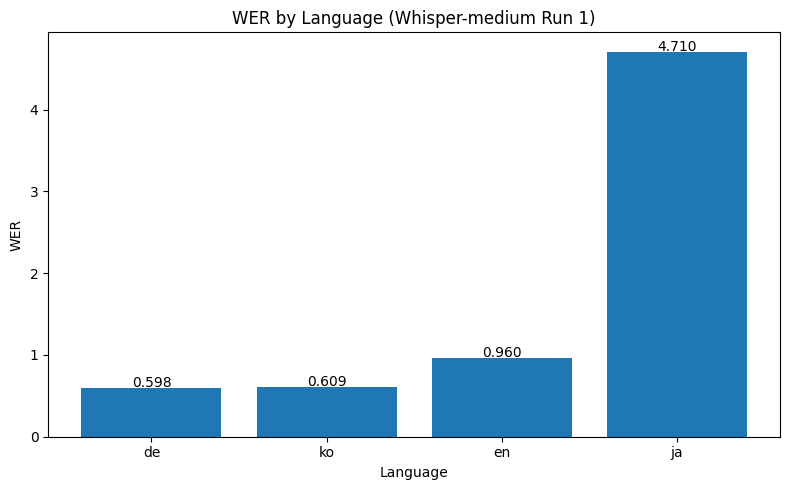

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-medium Run 1)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_medium_run1.png")
plt.show()